# Semana 4: Implementación de Modelos de Deep learning

Autor: Dan Santivañez Gutarra


### Objetivos:
*   Explorar el uso de una Red Neuronal Artificial (ANN)
*   Explorar el uso de una Red Neuronal Convolucional (CNN)
*   Explorar el uso de una Red Neuronal Recurrente (RNN)


## 1. Configuración del Entorno
Instalamos e importamos las librerías necesarias para trabajar con los datos y modelos.


In [1]:
!pip install kagglehub
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, mean_squared_error, mean_absolute_error, precision_score, recall_score
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

## 2. Red Neuronal Artificial (ANN) - Heart Disease

**Red Neuronal Artificial (ANN):**  
Es un modelo básico con capas densamente conectadas, ideal para clasificación y regresión con datos tabulares, como predecir enfermedades cardíacas.


### 2.1 Cargar y explorar el dataset

In [3]:
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")
heart_disease_path = os.path.join(path, 'heart_disease_uci.csv')
df_heart = pd.read_csv(heart_disease_path)
print("Primeras filas del dataset:")
df_heart.head()

Primeras filas del dataset:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### 2.2 Preprocesamiento

In [4]:
# - Eliminamos valores nulos.
df_heart = df_heart.dropna()
le = LabelEncoder()
for column in ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']:
    df_heart[column] = le.fit_transform(df_heart[column])

<ipython-input-4-eb5489fec316>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heart[column] = le.fit_transform(df_heart[column])
<ipython-input-4-eb5489fec316>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heart[column] = le.fit_transform(df_heart[column])
<ipython-input-4-eb5489fec316>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [5]:
# - Codificamos variables categóricas.
X = df_heart.drop(['id', 'num'], axis=1)
y = df_heart['num'].apply(lambda x: 1 if x > 0 else 0)

In [6]:
# - Escalamos características numéricas.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.3 Construcción del modelo ANN

In [8]:
model_ann = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_ann.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
history_ann = model_ann.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.5221 - loss: 0.7163 - val_accuracy: 0.4167 - val_loss: 0.7435
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5393 - loss: 0.6561 - val_accuracy: 0.4792 - val_loss: 0.6897
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6899 - loss: 0.6029 - val_accuracy: 0.6667 - val_loss: 0.6435
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7772 - loss: 0.5526 - val_accuracy: 0.7500 - val_loss: 0.6082
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8060 - loss: 0.5135 - val_accuracy: 0.7708 - val_loss: 0.5740
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8139 - loss: 0.4811 - val_accuracy: 0.7500 - val_loss: 0.5435
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8371 - loss: 0.4597 - val_accuracy: 0.7708 - val_loss: 0.5125
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8279 - loss: 0.4401 - val_accuracy: 0.8125 - val_loss: 0.4864


### 2.5 Evaluación y Visualización

In [10]:
# Evaluación
y_pred = (model_ann.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


In [11]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.8833
Precision: 0.8750
Recall: 0.8400
F1-Score: 0.8571


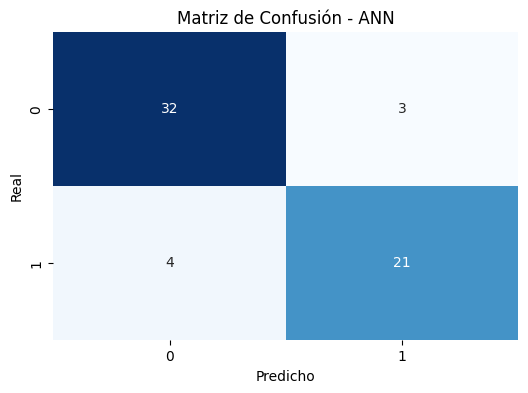

In [12]:
# Matriz de Confusión
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - ANN')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

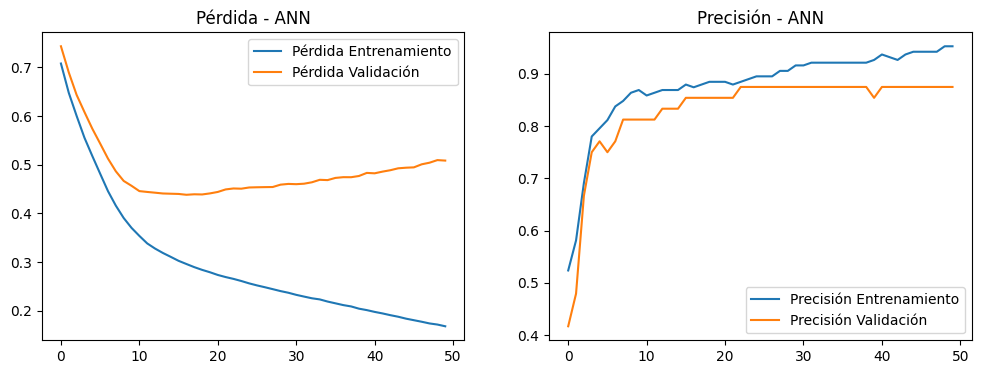

In [13]:
# Pérdida y Precisión
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_ann.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history_ann.history['val_loss'], label='Pérdida Validación')
plt.title('Pérdida - ANN')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history_ann.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history_ann.history['val_accuracy'], label='Precisión Validación')
plt.title('Precisión - ANN')
plt.legend()
plt.show()

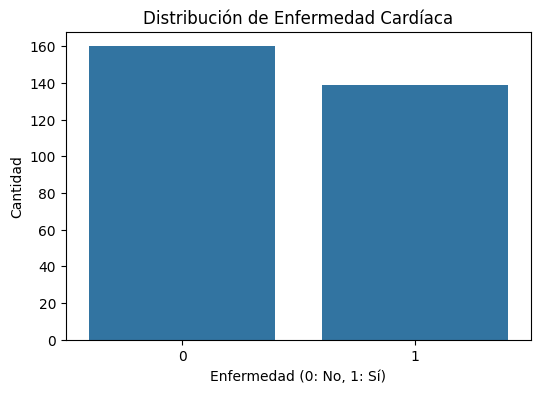

In [14]:
# Distribución de Clases
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title('Distribución de Enfermedad Cardíaca')
plt.xlabel('Enfermedad (0: No, 1: Sí)')
plt.ylabel('Cantidad')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


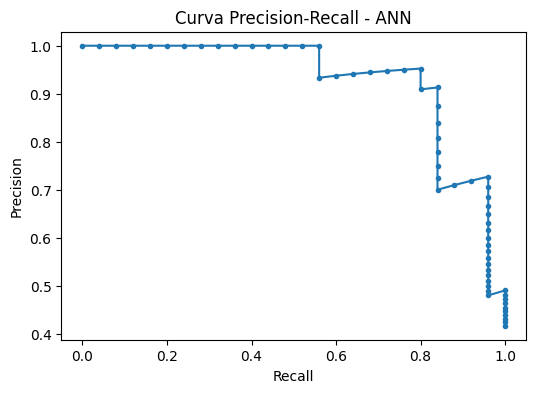

In [15]:

# Curva Precision-Recall
from sklearn.metrics import precision_recall_curve
prec, rec, _ = precision_recall_curve(y_test, model_ann.predict(X_test))
plt.figure(figsize=(6,4))
plt.plot(rec, prec, marker='.')
plt.title('Curva Precision-Recall - ANN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


In [ ]:
# Ejemplos de Predicciones para ANN
# Seleccionamos 10 ejemplos aleatorios del conjunto de prueba
indices = np.random.choice(len(X_test), 10, replace=False)
X_sample = X_test[indices]
y_sample_real = y_test.iloc[indices] if isinstance(y_test, pd.Series) else y_test[indices]
y_sample_pred = (model_ann.predict(X_sample) > 0.5).astype(int).flatten()

# Mostramos las predicciones y las etiquetas reales
for i in range(10):
    print(f"Ejemplo {i+1}:")
    print(f"Características (escaladas): {X_sample[i][:5]}...")  # Mostramos las primeras 5 características
    print(f"Predicción: {y_sample_pred[i]}, Real: {y_sample_real[i]}")
    print(f"Correcto: {'Sí' if y_sample_pred[i] == y_sample_real[i] else 'No'}")
    print("-" * 30)

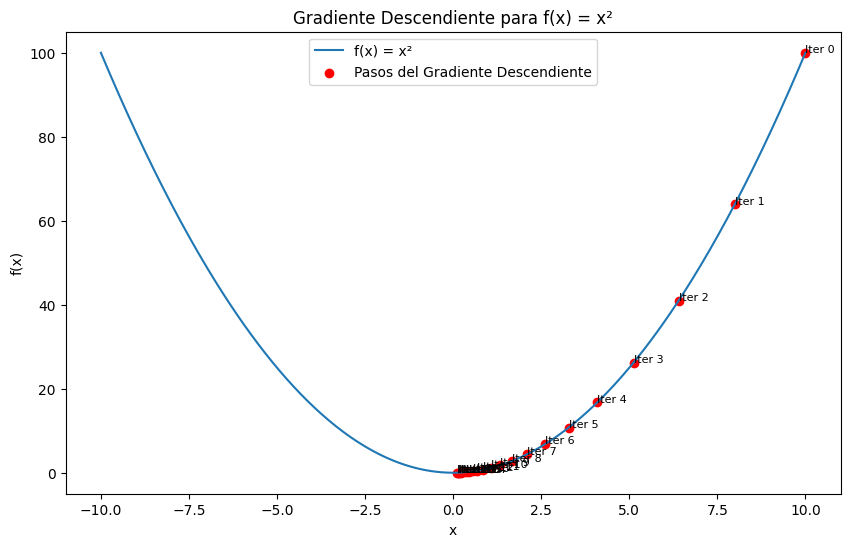

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Función objetivo
def f(x):
    return x**2

# Derivada de la función objetivo
def df(x):
    return 2*x

# Parámetros del gradiente descendiente
learning_rate = 0.1
iterations = 20
x = 10  # Valor inicial

# Lista para almacenar los valores de x
x_values = [x]

# Proceso de gradiente descendiente
for i in range(iterations):
    gradient = df(x)
    x = x - learning_rate * gradient
    x_values.append(x)

# Visualización
plt.figure(figsize=(10, 6))
x_range = np.linspace(-10, 10, 400)
plt.plot(x_range, f(x_range), label='f(x) = x²')
plt.scatter(x_values, [f(x) for x in x_values], color='red', label='Pasos del Gradiente Descendiente')
for i, (x_val, y_val) in enumerate(zip(x_values, [f(x) for x in x_values])):
    plt.text(x_val, y_val, f'Iter {i}', fontsize=8)
plt.title('Gradiente Descendiente para f(x) = x²')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

## 3. Red Neuronal Convolucional (CNN) - Digit Recognizer

**Red Neuronal Convolucional (CNN):**  
Diseñada para imágenes, usa capas convolucionales y pooling para extraer y reducir características.


### 3.1 Cargar y explorar el dataset

In [18]:
from tensorflow.keras.datasets import mnist
import numpy as np

# Cargar el dataset MNIST
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Mostrar información básica
print("Dimensiones del conjunto de entrenamiento:", X_train_full.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape)
print("Ejemplo de etiquetas:", y_train_full[:5])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Dimensiones del conjunto de entrenamiento: (60000, 28, 28)
Dimensiones del conjunto de prueba: (10000, 28, 28)
Ejemplo de etiquetas: [5 0 4 1 9]


### 3.2 Preprocesamiento

In [19]:
from sklearn.model_selection import train_test_split

# Normalizar los valores de los píxeles al rango [0, 1]
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

# Añadir dimensión para el canal (1, porque son imágenes en escala de grises)
X_train_full = X_train_full.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_val:", X_val.shape)
print("Dimensiones de X_test:", X_test.shape)

Dimensiones de X_train: (48000, 28, 28, 1)
Dimensiones de X_val: (12000, 28, 28, 1)
Dimensiones de X_test: (10000, 28, 28, 1)


### 3.3 Construcción del modelo CNN

In [20]:
from tensorflow import keras
from tensorflow.keras import layers

model_cnn = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model_cnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### 3.4 Entrenamiento

In [21]:
history_cnn = model_cnn.fit(X_train, y_train,
                            epochs=10,
                            batch_size=64,
                            validation_data=(X_val, y_val),
                            verbose=1)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 61ms/step - accuracy: 0.8760 - loss: 0.4064 - val_accuracy: 0.9802 - val_loss: 0.0646
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 97s 81ms/step - accuracy: 0.9819 - loss: 0.0599 - val_accuracy: 0.9833 - val_loss: 0.0539
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 77s 74ms/step - accuracy: 0.9877 - loss: 0.0384 - val_accuracy: 0.9855 - val_loss: 0.0484
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 67s 55ms/step - accuracy: 0.9918 - loss: 0.0260 - val_accuracy: 0.9888 - val_loss: 0.0383
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 55ms/step - accuracy: 0.9941 - loss: 0.0182 - val_accuracy: 0.9895 - val_loss: 0.0381
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 107s 88ms/step - accuracy: 0.9951 - loss: 0.0148 - val_accuracy: 0.9883 - val_loss: 0.0429
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 56s 54ms/step - accuracy: 0.9966 - loss: 0.0115 - val_accuracy: 0.9902 - val_loss: 0.0377
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9969 - loss: 0.0090 -

### 3.5 Evaluación y Visualización

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predicciones en el conjunto de prueba
y_pred = np.argmax(model_cnn.predict(X_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [23]:
# Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9908
Precision: 0.9908
Recall: 0.9908
F1-Score: 0.9908


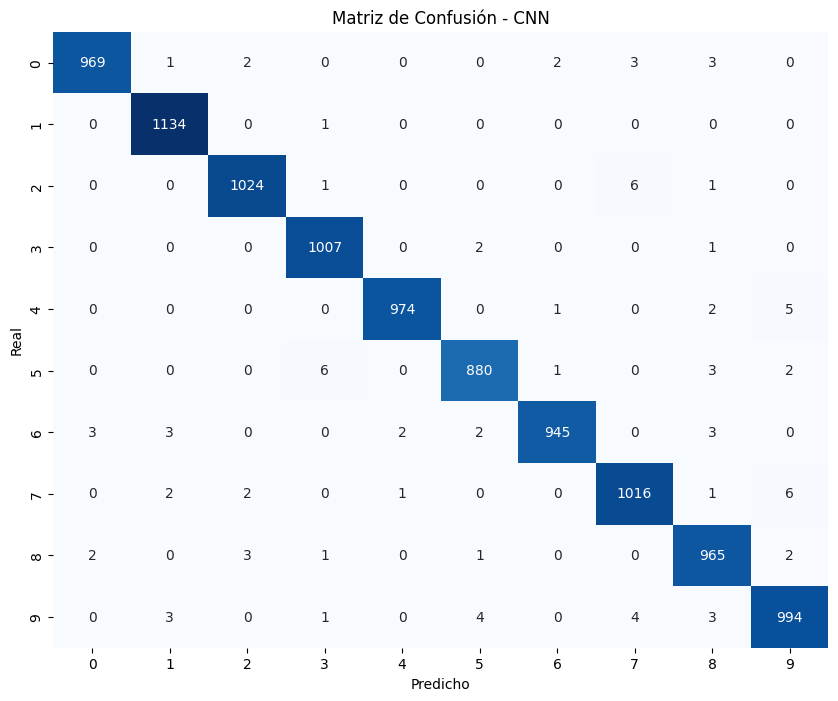

In [24]:
# Matriz de Confusión
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - CNN')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

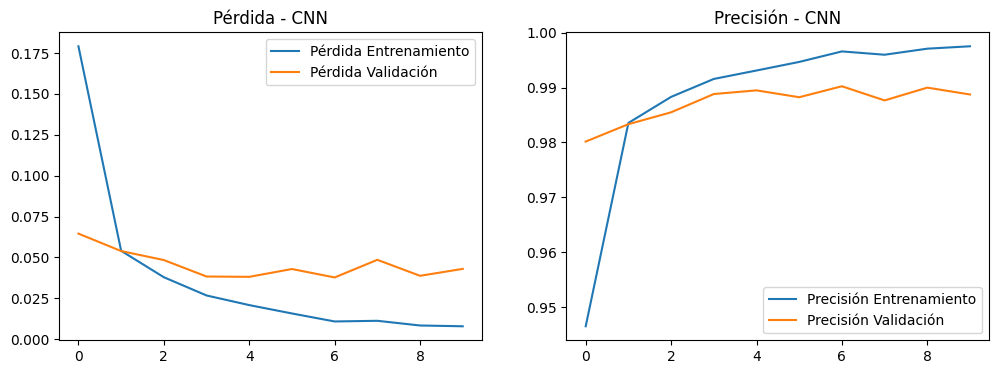

In [25]:
# Pérdida y Precisión
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_cnn.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history_cnn.history['val_loss'], label='Pérdida Validación')
plt.title('Pérdida - CNN')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history_cnn.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history_cnn.history['val_accuracy'], label='Precisión Validación')
plt.title('Precisión - CNN')
plt.legend()
plt.show()

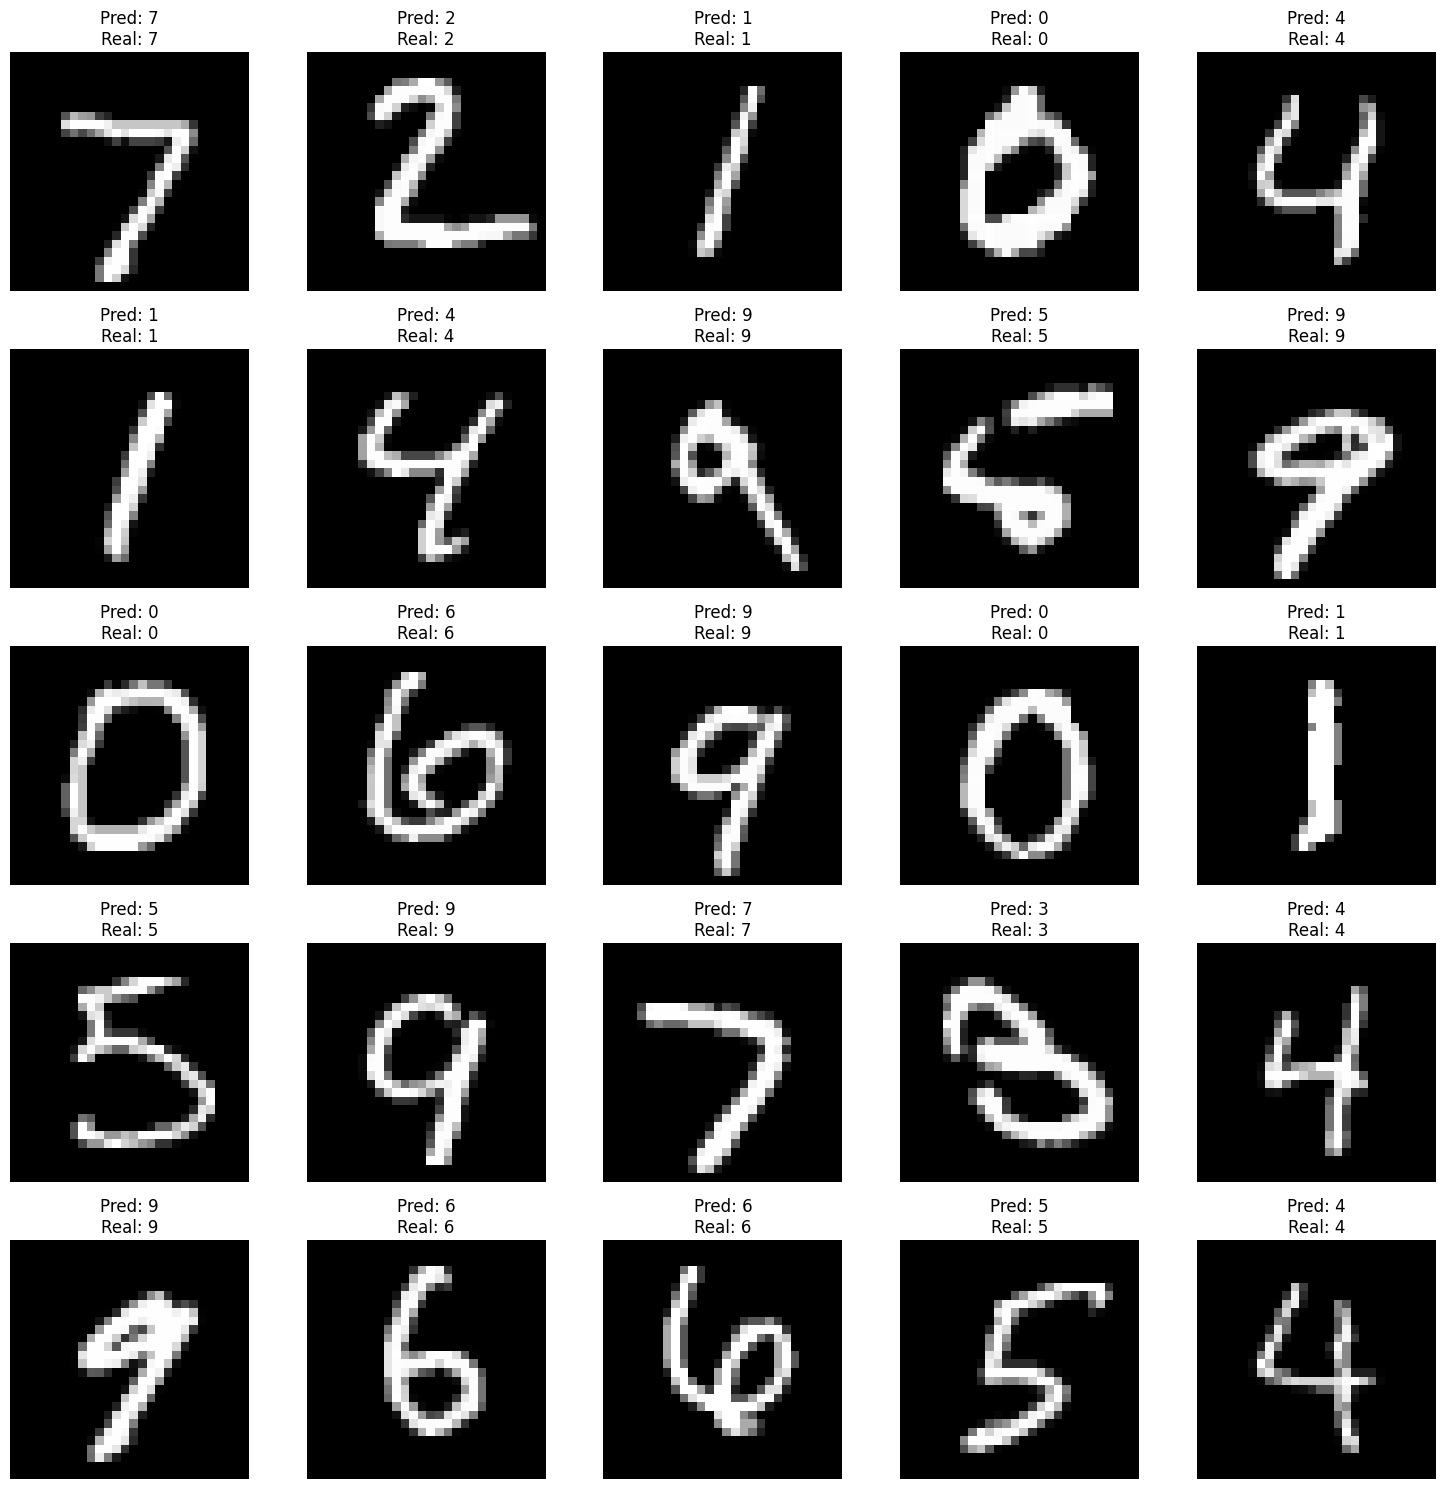

In [26]:
# Ejemplos de Predicciones
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()
for i in range(25):
    axes[i].imshow(X_test[i].reshape(28,28), cmap='gray')
    axes[i].set_title(f"Pred: {y_pred[i]}\nReal: {y_test[i]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

## 4. Red Neuronal LSTM - Stock Prices

**Red Neuronal de Memoria a Largo Plazo (LSTM):**

Ideal para datos secuenciales, como series temporales de precios de acciones.

### 4.1 Cargar y explorar el dataset

In [27]:
path = kagglehub.dataset_download("borismarjanovic/price-volume-data-for-all-us-stocks-etfs")
stock_path = os.path.join(path, 'Stocks/aapl.us.txt')
df_stock = pd.read_csv(stock_path)
print("Primeras filas del dataset:")
print(df_stock.head())

Primeras filas del dataset:
         Date     Open     High      Low    Close    Volume  OpenInt
0  1984-09-07  0.42388  0.42902  0.41874  0.42388  23220030        0
1  1984-09-10  0.42388  0.42516  0.41366  0.42134  18022532        0
2  1984-09-11  0.42516  0.43668  0.42516  0.42902  42498199        0
3  1984-09-12  0.42902  0.43157  0.41618  0.41618  37125801        0
4  1984-09-13  0.43927  0.44052  0.43927  0.43927  57822062        0


### 4.2 Preprocesamiento

In [28]:
data = df_stock['Close'].values.reshape(-1, 1)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [29]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [30]:
seq_length = 60
X, y = create_sequences(data_scaled, seq_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.3 Construcción del modelo LSTM

In [40]:
model_lstm = keras.Sequential([
    layers.LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    layers.LSTM(50),
    layers.Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')

model_lstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

### 4.4 Entrenamiento

In [32]:
history_lstm = model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - loss: 0.0739 - val_loss: 0.0016
Epoch 2/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 3/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 25s 93ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 4/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 5/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 6/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 22s 75ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 7/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 19s 67ms/step - loss: 0.0012 - val_loss: 0.0032
Epoch 8/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - loss: 0.0020 - val_loss: 6.8508e-04
Epoch 9/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - loss: 0.0011 - val_loss: 8.6963e-04
Epoch 10/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 8.9569e-04 - val_loss: 6.1279e-04
Epoch 11/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 8.1901e-04 - val_loss: 6.3548e-04
Epoch 

### 4.5 Evaluación y Visualización

In [33]:
# Evaluación
y_pred = model_lstm.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


In [34]:
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")

MSE: 0.6853
RMSE: 0.8279
MAE: 0.4284
MAPE: 11.3580%


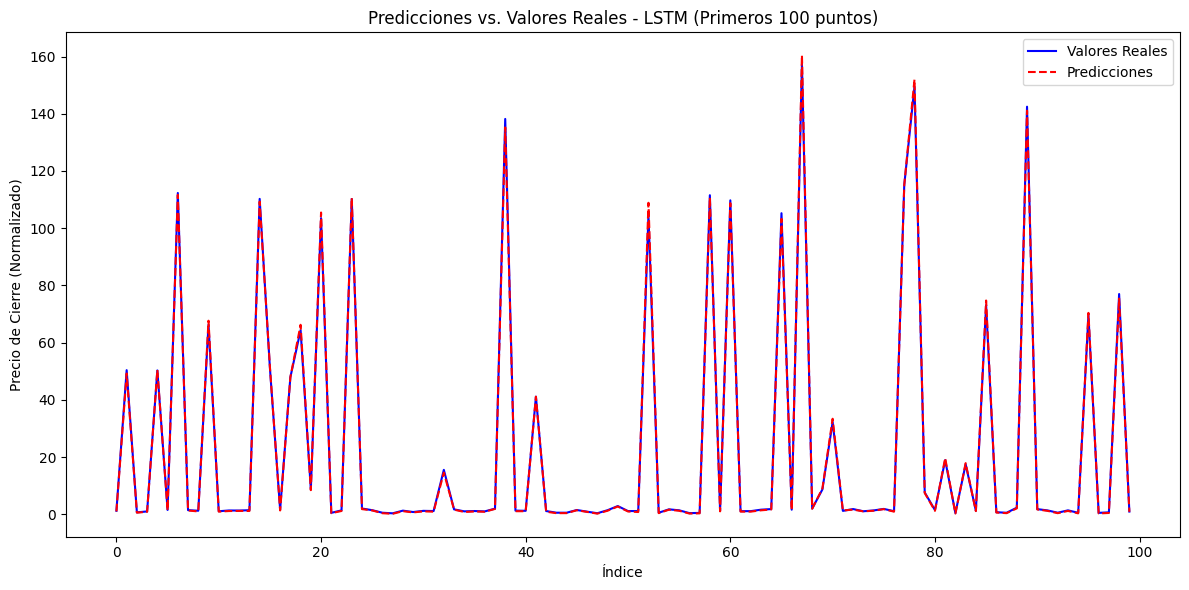

In [42]:
# Ejemplos de Predicciones para LSTM
# Seleccionamos un subconjunto de 100 puntos para visualizar
n_points = 100
plt.figure(figsize=(12, 6))
plt.plot(y_test[:n_points], label='Valores Reales', color='blue')
plt.plot(y_pred[:n_points], label='Predicciones', color='red', linestyle='--')
plt.title('Predicciones vs. Valores Reales - LSTM (Primeros 100 puntos)')
plt.xlabel('Índice')
plt.ylabel('Precio de Cierre (Normalizado)')
plt.legend()
plt.tight_layout()
plt.show()

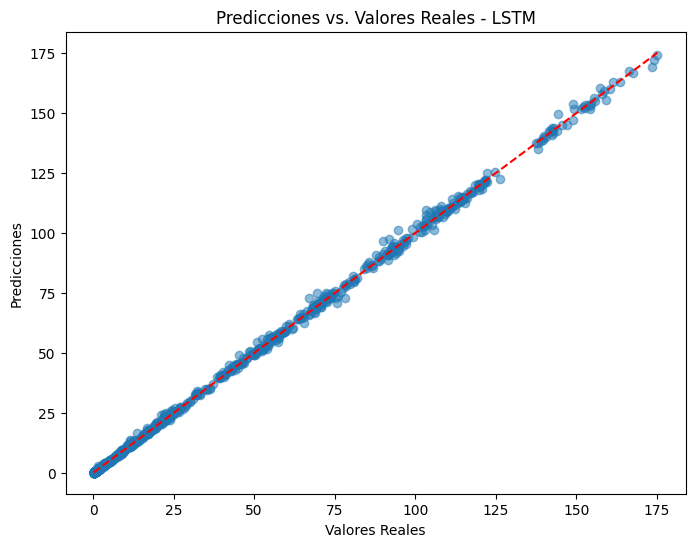

In [36]:
# Gráfico de Dispersión
# Muestra la relación entre valores reales y predichos en un gráfico de dispersión.
# Los puntos cercanos a la línea roja (y=x) indican predicciones precisas.
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales - LSTM')
plt.show()

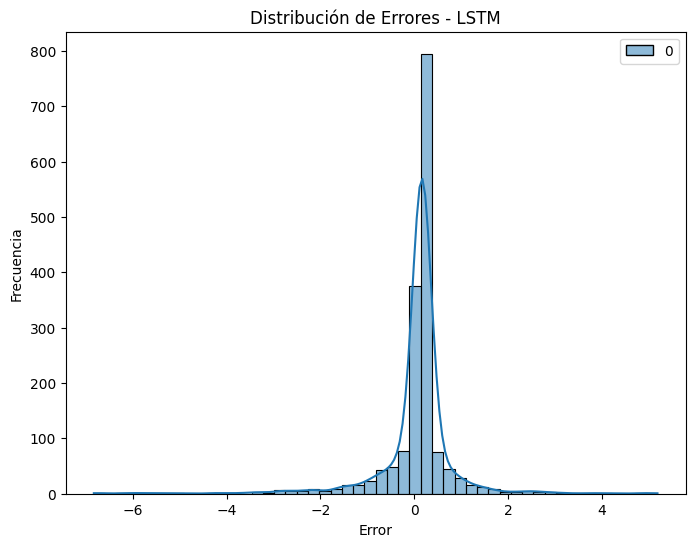

In [37]:
# Histograma de Errores
# Muestra la distribución de los errores (diferencia entre valores reales y predichos).
# La curva KDE indica la densidad; un pico cerca de 0 sugiere predicciones precisas.
errors = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(errors, bins=50, kde=True)
plt.title('Distribución de Errores - LSTM')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()

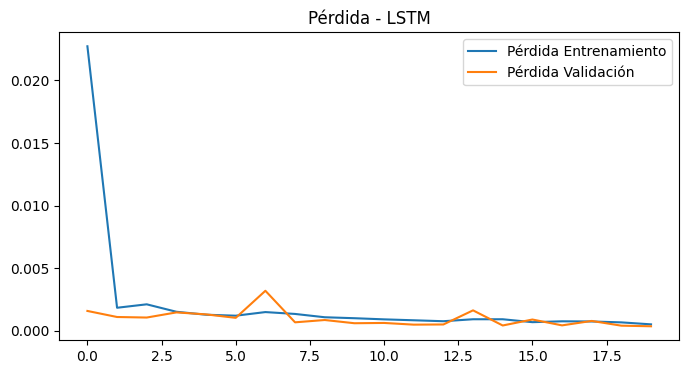

In [38]:
# Pérdida
plt.figure(figsize=(8,4))
plt.plot(history_lstm.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history_lstm.history['val_loss'], label='Pérdida Validación')
plt.title('Pérdida - LSTM')
plt.legend()
plt.show()

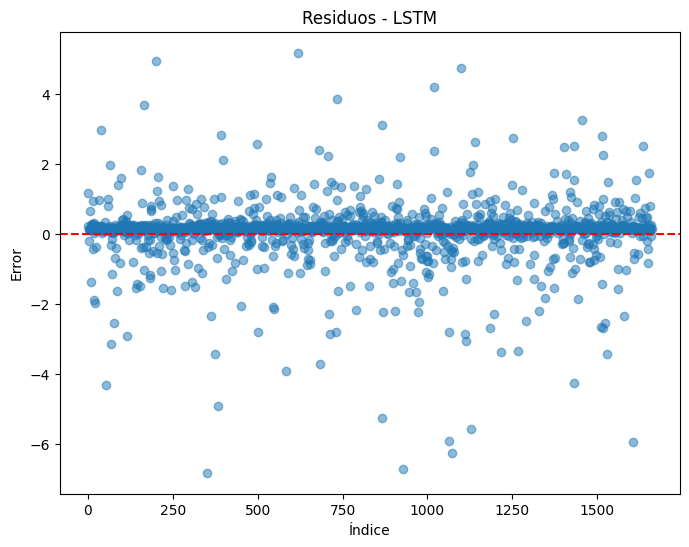

In [39]:
# Residuos
# Grafica los errores (residuos) frente al índice de las predicciones.
# Puntos cerca de la línea roja (y=0) indican predicciones precisas.
plt.figure(figsize=(8,6))
plt.plot(errors, 'o', alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title('Residuos - LSTM')
plt.xlabel('Índice')
plt.ylabel('Error')
plt.show()

## 5. Conclusiones
- ANN: Clasificación binaria con métricas detalladas y visualizaciones.
- CNN: Clasificación multiclase con ejemplos y distribución de clases.
- LSTM: Predicción de series temporales con análisis de errores extendido.